In [1]:
%%capture
import xarray as xr
import os
import time
import numpy as np

In [85]:
TRAJ_DIR = '/data/users/grivera/ARGO-traj/{}_Rtraj.nc'
FLOAT_ID = '3901267'

In [86]:
data = xr.open_dataset(TRAJ_DIR.format(FLOAT_ID))
data

<xarray.Dataset>
Dimensions:                              (N_CYCLE: 284, N_HISTORY: 25, N_MEASUREMENT: 105496, N_PARAM: 3)
Dimensions without coordinates: N_CYCLE, N_HISTORY, N_MEASUREMENT, N_PARAM
Data variables:
    DATA_TYPE                            object ...
    FORMAT_VERSION                       object ...
    HANDBOOK_VERSION                     object ...
    REFERENCE_DATE_TIME                  object ...
    DATE_CREATION                        object ...
    DATE_UPDATE                          object ...
    PLATFORM_NUMBER                      object ...
    PROJECT_NAME                         object ...
    PI_NAME                              object ...
    TRAJECTORY_PARAMETERS                (N_PARAM) object ...
    DATA_CENTRE                          object ...
    DATA_STATE_INDICATOR                 object ...
    PLATFORM_TYPE                        object ...
    FLOAT_SERIAL_NO                      object ...
    FIRMWARE_VERSION                     object 

In [87]:
def get_cycle_path(filename):
    argo_file = xr.open_dataset(filename)
    upstamp = argo_file.JULD_FIRST_LOCATION
    dwstamp = argo_file.JULD_LAST_LOCATION
    MASK = ~np.isnat(data.JULD)
    tstamp = data.JULD[MASK]
    lat = data.LATITUDE[MASK]
    lon = data.LONGITUDE[MASK]
    elon = np.array([])
    elat = np.array([])
    times = np.array([],dtype=np.datetime64)
    for cycle in range(upstamp.size):
        lons = lon[np.where((tstamp==upstamp[cycle])|(tstamp==dwstamp[cycle]))]
        lons = lons[~np.isnan(lons)]
        elon = np.hstack([elon, lons[0], lons[-1]])
        lats = lat[np.where((tstamp==upstamp[cycle])|(tstamp==dwstamp[cycle]))]
        lats = lats[~np.isnan(lats)]
        elat = np.hstack([elat, lats[0], lats[-1]])
        times = np.hstack([times,upstamp[cycle],dwstamp[cycle]])
    return elat, elon, times

lats, lons ,time = get_cycle_path(TRAJ_DIR.format(FLOAT_ID))

In [88]:
import datetime

today = np.datetime64(datetime.date.today())
time_mask = (today - time) < np.timedelta64(365,'D')

In [89]:
lats.size

568

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
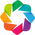

In [90]:
import holoviews as hv
import geoviews as gv
from cartopy import crs
hv.extension('bokeh')

In [103]:
proj = crs.PlateCarree()
maplot = (gv.Path(gv.feature.coastline.geoms('10m',bounds=(-90, -20,-70,0)),group='border') *
          gv.Path(gv.feature.borders.geoms('10m',bounds=(-90, -20,-70,0)),group='border'))

x = lons[time_mask]#np.where(lons[time_mask]<0,lons[time_mask]+360,lons[time_mask])
y = lats[time_mask]

overlay = maplot * gv.Path((x,y,range(x.size)),vdims='date',group='traj') *gv.Points((x,y)).options(size=4)

overlay.opts(gv.opts.Path('traj', color='date',line_width=2,cmap='Viridis', colorbar=True,),
             gv.opts.Points(color='black',size=1,marker='s'),
            gv.opts.Path('border', color='black'),
            gv.opts.Overlay(xlim=(-90,-70),ylim=(-20,0),projection=proj,width=600,height=600))

:Overlay
   .Border.I  :Path   [Longitude,Latitude]
   .Border.II :Path   [Longitude,Latitude]
   .Traj.I    :Path   [x,y]   (date)
   .Points.I  :Points   [x,y]

In [104]:
time

array(['2016-03-16T19:48:00.002108160', '2016-03-16T19:52:00.002114048',
       '2016-03-17T07:01:00.000752384', '2016-03-17T07:09:00.000764160',
       '2016-03-18T14:18:00.001528064', '2016-03-18T14:27:00.001541376',
       '2016-03-19T21:40:00.002311168', '2016-03-19T21:52:00.002328576',
       '2016-03-21T05:10:00.000550912', '2016-03-21T05:24:00.000571392',
       '2016-03-26T05:35:00.000587264', '2016-03-26T05:44:00.000600320',
       '2016-03-31T06:03:00.000648192', '2016-03-31T06:12:00.000661248',
       '2016-04-05T06:32:00.000690176', '2016-04-05T06:41:00.000703232',
       '2016-04-10T07:00:00.000751104', '2016-04-10T07:10:00.000765440',
       '2016-04-15T07:27:00.000790272', '2016-04-15T07:37:00.000804864',
       '2016-04-20T07:58:00.000835328', '2016-04-20T08:06:00.000867072',
       '2016-04-25T08:25:00.000894720', '2016-04-25T08:34:00.000907776',
       '2016-04-30T08:57:00.000941056', '2016-04-30T09:14:00.000985856',
       '2016-05-05T09:36:00.001017856', '2016-05-05

In [82]:
lons.size

382

In [125]:
upstamp = data.JULD_FIRST_LOCATION
dwstamp = data.JULD_LAST_LOCATION

In [126]:
mask = ~np.isnat(data.JULD)
tstamp = data.JULD[mask]
lat = data.LATITUDE[mask]
lon = data.LONGITUDE[mask]
tstamp[:49]

<xarray.DataArray 'JULD' (N_MEASUREMENT: 49)>
array(['2014-11-27T09:30:00.001009152', '2014-11-27T09:34:37.001014784',
       '2014-11-27T09:44:07.001029632', '2014-11-27T09:50:32.001038080',
       '2014-11-27T09:53:42.001042432', '2014-11-27T09:55:42.001045248',
       '2014-11-27T09:57:42.001048064', '2014-11-27T10:08:00.001084416',
       '2014-11-27T10:09:26.001085696', '2014-11-27T10:09:36.001085952',
       '2014-11-27T10:09:50.001085696', '2014-11-27T10:09:50.001085696',
       '2014-11-27T10:14:02.001093120', '2014-11-27T10:15:42.001094400',
       '2014-11-27T10:17:22.001097728', '2014-11-27T10:19:02.001100288',
       '2014-11-27T10:20:42.001101824', '2014-11-27T10:22:22.001104896',
       '2014-11-27T10:24:02.001107712', '2014-11-27T10:25:42.001108992',
       '2014-11-27T10:27:22.001112320', '2014-11-27T10:47:22.001141248',
       '2014-11-27T11:07:22.001190400', '2014-11-27T11:27:22.001219584',
       '2014-11-27T11:47:22.001248512', '2014-11-27T12:07:22.001297664',
     

In [127]:
tstamp[np.where((tstamp>=upstamp[0])&(tstamp<=dwstamp[0]))]
wat = lat[np.where((tstamp==upstamp[0])|(tstamp==dwstamp[0]))]
wat
np.hstack([wat[0],wat[-1]])

array([-1.92679, -1.92679])

In [145]:
data.LATITUDE[50:70]

<xarray.DataArray 'LATITUDE' (N_MEASUREMENT: 20)>
array([     nan,      nan,      nan,      nan,      nan, -1.92365,      nan,
            nan,      nan,      nan, -1.92462,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan])
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:      Latitude of each location
    standard_name:  latitude
    units:          degree_north
    valid_min:      -90.0
    valid_max:      90.0
    axis:           Y

In [144]:
data.JULD[50:70]

<xarray.DataArray 'JULD' (N_MEASUREMENT: 20)>
array(['2014-11-27T18:27:07.001970432', '2014-11-27T18:29:12.001973248',
       '2014-11-27T18:31:12.001976320', '2014-11-27T18:33:12.001979136',
                                 'NaT', '2014-11-27T18:44:00.001995008',
       '2014-11-27T18:46:14.001998080', '2014-11-27T18:46:24.001998080',
       '2014-11-27T18:50:25.002003712', '2014-11-27T18:50:25.002003712',
       '2014-11-27T18:54:00.002009600', '2014-11-27T18:54:41.002009600',
       '2014-11-27T18:56:21.002012416', '2014-11-27T18:58:01.002015488',
       '2014-11-27T18:59:41.002016768', '2014-11-27T19:01:21.002039808',
       '2014-11-27T19:03:01.002042880', '2014-11-27T19:04:41.002044160',
       '2014-11-27T19:06:21.002046976', '2014-11-27T19:08:01.002050048'],
      dtype='datetime64[ns]')
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:      Julian day (UTC) of each measurement relative to REFERENC...
    standard_name:  time
    conventions:    Relative 

In [11]:
data.JULD_ASCENT_END[1]

<xarray.DataArray 'JULD_ASCENT_END' ()>
array('2014-11-27T18:33:12.001979136', dtype='datetime64[ns]')
Attributes:
    long_name:      End date of ascent to the surface
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     1.1574e-05

In [142]:
data.JULD_TRANSMISSION_START[1]

<xarray.DataArray 'JULD_TRANSMISSION_START' ()>
array('2014-11-27T18:46:14.001998080', dtype='datetime64[ns]')
Attributes:
    long_name:      Start date of transmission
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     1.1574e-05

In [8]:
data.JULD_TRANSMISSION_END[1]

<xarray.DataArray 'JULD_TRANSMISSION_END' ()>
array('2014-11-27T18:50:25.002003712', dtype='datetime64[ns]')
Attributes:
    long_name:      Transmission end date
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     1.1574e-05

In [9]:
data.JULD_DESCENT_START

<xarray.DataArray 'JULD_DESCENT_START' (N_CYCLE: 159)>
array([                          'NaT', '2014-11-27T10:14:02.001093120',
       '2014-11-27T18:54:41.002009600', '2014-11-28T18:36:46.001983488',
       '2014-11-29T18:00:32.001931008', '2014-11-30T17:21:41.001854208',
       '2014-12-10T16:18:02.001742592', '2014-12-20T15:19:07.001637120',
       '2014-12-30T14:36:54.001554432', '2015-01-09T15:48:11.001679104',
       '2015-01-19T16:06:05.001725184', '2015-01-29T17:16:01.001847040',
       '2015-02-08T16:14:17.001736960', '2015-02-18T15:04:39.001615104',
       '2015-02-28T13:52:41.001470208', '2015-03-10T13:05:03.001402112',
       '2015-03-20T14:26:57.001539584', '2015-03-30T13:26:23.001432576',
       '2015-04-09T12:06:28.001296128', '2015-04-19T13:04:13.001400576',
       '2015-04-29T12:58:42.001371392', '2015-05-09T12:45:38.001352960',
       '2015-05-19T12:15:16.001309184', '2015-05-29T12:33:08.001335296',
       '2015-06-08T12:23:40.001320704', '2015-06-18T12:18:44.00131353

In [147]:
data.JULD_FIRST_LOCATION[:5]

<xarray.DataArray 'JULD_FIRST_LOCATION' (N_CYCLE: 5)>
array(['2014-11-27T10:08:00.001084416', '2014-11-27T18:44:00.001995008',
       '2014-11-28T18:22:00.001963264', '2014-11-29T17:54:00.001902336',
       '2014-11-30T17:09:00.001837056'], dtype='datetime64[ns]')
Dimensions without coordinates: N_CYCLE
Attributes:
    long_name:      Date of earliest location
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     1.1574e-05

In [140]:
data.JULD_LAST_LOCATION[1]

<xarray.DataArray 'JULD_LAST_LOCATION' ()>
array('2014-11-27T18:54:00.002009600', dtype='datetime64[ns]')
Attributes:
    long_name:      Date of latest location
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     1.1574e-05

In [146]:
data.JULD_DESCENT_START

<xarray.DataArray 'JULD_DESCENT_START' (N_CYCLE: 157)>
array([                          'NaT', '2014-11-27T10:14:02.001093120',
       '2014-11-27T18:54:41.002009600', '2014-11-28T18:36:46.001983488',
       '2014-11-29T18:00:32.001931008', '2014-11-30T17:21:41.001854208',
       '2014-12-10T16:18:02.001742592', '2014-12-20T15:19:07.001637120',
       '2014-12-30T14:36:54.001554432', '2015-01-09T15:48:11.001679104',
       '2015-01-19T16:06:05.001725184', '2015-01-29T17:16:01.001847040',
       '2015-02-08T16:14:17.001736960', '2015-02-18T15:04:39.001615104',
       '2015-02-28T13:52:41.001470208', '2015-03-10T13:05:03.001402112',
       '2015-03-20T14:26:57.001539584', '2015-03-30T13:26:23.001432576',
       '2015-04-09T12:06:28.001296128', '2015-04-19T13:04:13.001400576',
       '2015-04-29T12:58:42.001371392', '2015-05-09T12:45:38.001352960',
       '2015-05-19T12:15:16.001309184', '2015-05-29T12:33:08.001335296',
       '2015-06-08T12:23:40.001320704', '2015-06-18T12:18:44.00131353

In [65]:
data.JULD_DESCENT_START[:49]

<xarray.DataArray 'JULD_DESCENT_START' (N_CYCLE: 49)>
array([                          'NaT', '2016-03-16T19:52:57.002113792',
       '2016-03-17T07:09:29.000763904', '2016-03-18T14:27:16.001541120',
       '2016-03-19T21:52:06.002328832', '2016-03-21T05:24:12.000571392',
       '2016-03-26T05:44:09.000600320', '2016-03-31T06:12:53.000660992',
       '2016-04-05T06:41:08.000703232', '2016-04-10T07:10:30.000765696',
       '2016-04-15T07:37:46.000804864', '2016-04-20T08:06:45.000866816',
       '2016-04-25T08:34:12.000907776', '2016-04-30T09:14:43.000985856',
       '2016-05-05T09:48:51.001035264', '2016-05-10T10:14:48.001093120',
       '2016-05-15T10:43:10.001135104', '2016-05-20T11:19:14.001207808',
       '2016-05-25T12:00:31.001287424', '2016-05-30T12:31:36.001332480',
       '2016-06-04T13:10:15.001409280', '2016-06-09T13:34:55.001444096',
       '2016-06-14T14:09:56.001515008', '2016-06-19T14:43:55.001564416',
       '2016-06-24T15:15:27.001631232', '2016-06-29T15:46:29.001676032

In [13]:
mask = (argo_data.LONGITUDE > -90) & (argo_data.LONGITUDE <-80) & (argo_data.LATITUDE < 0) & (argo_data.LATITUDE > -10)
argo_data.LATITUDE[mask]

<xarray.DataArray 'LATITUDE' (N_PROF: 1)>
array([-8.161])
Dimensions without coordinates: N_PROF
Attributes:
    long_name:      Latitude of the station, best estimate
    standard_name:  latitude
    units:          degree_north
    valid_min:      -90.0
    valid_max:      90.0
    axis:           Y

In [17]:
import gsw

In [33]:
gsw.conversions.z_from_p(argo_data.PRES,np.repeat([argo_data.LATITUDE],1024,axis=0).T)

array([[ -1.15023304,  -2.06248221,  -3.01439013, ...,          nan,
                 nan,          nan],
       [ -4.47444544, -10.73850497, -17.40007191, ...,          nan,
                 nan,          nan],
       [ -1.07365552,  -1.98824645,  -2.98236243, ...,          nan,
                 nan,          nan],
       ...,
       [ -1.0728805 ,  -2.0662832 ,  -3.0199454 , ...,          nan,
                 nan,          nan],
       [ -3.96469681,  -5.84790091,  -7.9293166 , ...,          nan,
                 nan,          nan],
       [ -1.03153862,  -1.98372357,  -2.97557813, ...,          nan,
                 nan,          nan]])

In [38]:
np.repeat([argo_data.LATITUDE],1024,axis=0).T.shape

(215, 1024)

In [39]:
argo_data.TEMP.shape

(215, 1024)

In [41]:
argo_data.PSAL

<xarray.DataArray 'PSAL' (N_PROF: 215, N_LEVELS: 1024)>
[220160 values with dtype=float32]
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes:
    long_name:       Practical salinity
    standard_name:   sea_water_salinity
    units:           psu
    valid_min:       2.0
    valid_max:       41.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001

In [11]:
argo_data.DATA_CENTRE[(argo_data.LATITUDE>-0.5) & (argo_data.LATITUDE<0.5)]

<xarray.DataArray 'DATA_CENTRE' (N_PROF: 5)>
array([b'AO', b'AO', b'AO', b'AO', b'AO'], dtype=object)
Dimensions without coordinates: N_PROF
Attributes:
    long_name:    Data centre in charge of float data processing
    conventions:  Argo reference table 4

In [12]:
plat_nm=argo_data.PLATFORM_NUMBER[(argo_data.LATITUDE>-0.5) & (argo_data.LATITUDE<0.5)].astype(str)
plat_nm

<xarray.DataArray 'PLATFORM_NUMBER' (N_PROF: 5)>
array(['3901162 ', '4901656 ', '5904947 ', '5904552 ', '3901159 '], dtype='<U8')
Dimensions without coordinates: N_PROF

In [13]:
#plat_nm.to_dataframe().to_csv('prof_list.txt',sep='\t',header=False, index=None)

In [106]:
traj = xr.open_dataset('/data/users/grivera/ARGO-traj/4901656_Rtraj.nc')
traj

<xarray.Dataset>
Dimensions:                              (N_CYCLE: 157, N_HISTORY: 25, N_MEASUREMENT: 7956, N_PARAM: 3)
Dimensions without coordinates: N_CYCLE, N_HISTORY, N_MEASUREMENT, N_PARAM
Data variables:
    DATA_TYPE                            object ...
    FORMAT_VERSION                       object ...
    HANDBOOK_VERSION                     object ...
    REFERENCE_DATE_TIME                  object ...
    DATE_CREATION                        object ...
    DATE_UPDATE                          object ...
    PLATFORM_NUMBER                      object ...
    PROJECT_NAME                         object ...
    PI_NAME                              object ...
    TRAJECTORY_PARAMETERS                (N_PARAM) object ...
    DATA_CENTRE                          object ...
    DATA_STATE_INDICATOR                 object ...
    PLATFORM_TYPE                        object ...
    FLOAT_SERIAL_NO                      object ...
    FIRMWARE_VERSION                     object ..

In [107]:
import datetime

In [177]:
olddate=np.datetime64(datetime.date.today()-datetime.timedelta(days=365))
olddate

numpy.datetime64('2018-01-22')

In [178]:
mask = traj.JULD>olddate
traj.JULD[mask]

<xarray.DataArray 'JULD' (N_MEASUREMENT: 1471)>
array(['2018-01-22T01:32:02.000153600', '2018-01-22T07:32:02.000797440',
       '2018-01-22T13:32:02.001441024', ..., '2019-01-11T12:17:30.001312256',
       '2019-01-11T12:17:30.001312256', '2019-01-11T12:17:30.001312256'],
      dtype='datetime64[ns]')
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:      Julian day (UTC) of each measurement relative to REFERENC...
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     1.1574074051168282e-05
    axis:           T

In [179]:
lats = traj.LONGITUDE[mask]
lats

<xarray.DataArray 'LONGITUDE' (N_MEASUREMENT: 1471)>
array([    nan,     nan,     nan, ..., 173.249,     nan,     nan])
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:      Longitude of each location
    standard_name:  longitude
    units:          degree_east
    valid_min:      -180.0
    valid_max:      180.0
    axis:           X

In [180]:
lons = traj.LATITUDE[mask]
lons

<xarray.DataArray 'LATITUDE' (N_MEASUREMENT: 1471)>
array([   nan,    nan,    nan, ..., -0.542,    nan,    nan])
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:      Latitude of each location
    standard_name:  latitude
    units:          degree_north
    valid_min:      -90.0
    valid_max:      90.0
    axis:           Y

In [182]:
coords = np.column_stack((lats,lons)) #50723,70679
coords = coords[~np.isnan(coords)].reshape((37,2))
coords

array([[ 1.58969e+02,  9.26000e-01],
       [ 1.59555e+02,  1.41000e+00],
       [ 1.60382e+02,  1.48200e+00],
       [ 1.61806e+02,  1.17200e+00],
       [ 1.62898e+02,  1.27200e+00],
       [ 1.63303e+02,  9.58000e-01],
       [ 1.63474e+02,  6.88000e-01],
       [ 1.63903e+02,  3.86000e-01],
       [ 1.65488e+02,  9.51000e-01],
       [ 1.66777e+02,  1.07000e+00],
       [ 1.68003e+02,  8.58000e-01],
       [ 1.68886e+02,  9.87000e-01],
       [ 1.69415e+02,  9.99000e-01],
       [ 1.70084e+02,  8.77000e-01],
       [ 1.70692e+02,  1.23900e+00],
       [ 1.71073e+02,  9.73000e-01],
       [ 1.71399e+02,  9.64000e-01],
       [ 1.71658e+02,  1.16500e+00],
       [ 1.71750e+02,  1.28800e+00],
       [ 1.71736e+02,  1.13300e+00],
       [ 1.72440e+02,  1.52200e+00],
       [ 1.72130e+02,  5.79000e-01],
       [ 1.71007e+02,  1.69000e-01],
       [ 1.69697e+02,  2.85000e-01],
       [ 1.68699e+02,  8.12000e-01],
       [ 1.67858e+02,  5.27000e-01],
       [ 1.67371e+02, -6.68000e-01],
 

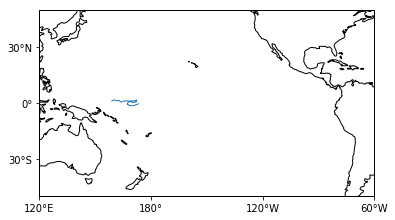

In [189]:
%matplotlib inline
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
proj = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.plot(lats[~np.isnan(lats)]-180,lons[~np.isnan(lons)],ls='-',lw=1)
ax.set_extent([-60, 120, -50, 50], crs=proj)
ax.coastlines()